# Housing Price Prediction using Ridge and Lasso Regression

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. 

**Objective** is to build a regression model using Regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

**The solution is divided into the following sections:**
- Data understanding and exploration
- Data cleaning, Visualisation and Manipulation
- Data preparation
- Model building and evaluation
- Conclusion

## Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading the dataset & checking first 5 rows

housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking number of rows
print("-------- Checking Rows and Columns --------")
housing.shape

-------- Checking Rows and Columns --------


(1460, 81)

In [5]:
# checking the statistical values of numerical columns
print("-------- Checking Statistical values of Numeric columns --------")
housing.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

-------- Checking Statistical values of Numeric columns --------


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567

From above table we can see below things:
1. 'LotArea' - There is huge difference between 99th Percentile and Highest value. This needs analysis later.
2. Columns like : - 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea' and 'MiscVal' have almost all values concentrated towards > 95%, these also needs analysis separately to check for Skewness in data

In [6]:
# Lets see if we have any Duplicate records
print("-------- Checking presence of Duplicate Records --------")
housing[housing.duplicated(keep=False)]

-------- Checking presence of Duplicate Records --------


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
#checking datatypes and NULL info
print("-------- Checking Datatypes and Not NULL count --------")
housing.info()

-------- Checking Datatypes and Not NULL count --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 

In [8]:
# Checking NULL records as Percentage
print("-------- Checking Null (%) --------")
round((housing.isna().sum()/len(housing.index))*100,2).sort_values(ascending=False)

-------- Checking Null (%) --------


PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

There are multiple columns which have NULL records in high percentage (>80%) like - 
- 'Alley'
- 'PoolQC'
- 'Fence'
- 'MiscFeature'

Imputing such high percent of NULL values doesnt seems to be the right choice as we will have only 1 value present for the whole column. We need to **DROP** these features completely.

We have other columns which has NULL value but lower in comparison to above 4, we will look for either **imputing** or dropping rows of the missing values for these.


We have one variable 'FireplaceQu' which also has nearly 50% NULL value but before dropping that feature, we will see the relationship with Target variable and check for multicollinearity, to check if any other feature can compensate of this.'

## Data Cleaning, Visualisation and Manipulation

### Null Values cleaning

In [9]:
# Dropping columns which are not requried for analysis like - 'ID' and which have high NULL values like -
# -Alley
# -PoolQC
# -Fence
# -MiscFeature

housing = housing.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


So we have now dropped the 4 columns which had almost all values as NULL, now lets inspect the columns which had almost ~50% of NULL values -
#### FireplaceQu

In [10]:
# Lets check the value counts for 'FireplaceQu' column

housing.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

As per Data Dictionary for this feature - 'NA' value represents 'No Fireplace', so we can impute the missing value with 'No' value

In [11]:
# As per data dictionary, missing value for this column means 'No Fireplace'

housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan,'None')

In [12]:
# Lets check the value counts again

housing.FireplaceQu.value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

Now, lets inspect the other NULL columns and decide what needs to be done for these - 

- LotFrontage
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Electrical
- MasVnrType
- MasVnrArea

#### LotFrontage

<AxesSubplot:xlabel='LotFrontage'>

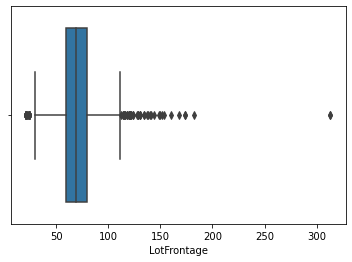

In [13]:
# Boxplot to see distribution range

sns.boxplot(housing['LotFrontage'])

As per Data Dictionary - this is street connecting the property and we have seen that 'Street' feature has no null values, so we will assume that missing values are due to data not collected for this feature.
We can also see from above BoxPlot that lot of values are outside the IRQ thus using MEAN is not a good idea.

We will use MEDIAN to replace the missing values.

In [14]:
# Lets impute the missing values with MEDIAN

housing['LotFrontage'].fillna((housing.LotFrontage.median()), inplace=True)

#### GarageType, GarageFinish, GarageQual, GarageCond

In [15]:
# As per data dictionary for columns - GarageType, GarageFinish, GarageQual, GarageCond , 
# missing values means 'No Garage'

housing.loc[housing['GarageType'].isnull(),['GarageType']] = 'No Garage'
housing.loc[housing['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
housing.loc[housing['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
housing.loc[housing['GarageCond'].isnull(),['GarageCond']] = 'No Garage'

#### GarageYrBlt

For Garage Year Built - the missing values in this column are for the houses which doesnt have garage. We will caculate the House Age later as a new feature. Similary, we can calculate the Garage Age so if no Garage is built then age must be 0. 
In order to make age = 0, we will assign current year value (2021) in place of missing ones so that we age is calculated, it will come as 0 (2021-2021)

In [16]:
housing.loc[housing['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2021

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [17]:
# As per data dictionary for columns - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# missing values means 'No Basement'

housing.loc[housing['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
housing.loc[housing['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
housing.loc[housing['BsmtExposure'].isnull(),['BsmtExposure']] = 'No Basement'
housing.loc[housing['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
housing.loc[housing['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'

#### Electrical

In [18]:
# Lets inspect the different values and their numbers in Electical feature
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

We can see that 'SBrkr' has maximum occurence so lets replace NULL with this value (mode)

In [19]:
# Replacing the missing values in Electrical with mode

housing.loc[housing['Electrical'].isnull(),['Electrical']] = 'SBrkr'

#### MasVnrType & MasVnrArea

In [20]:
# Lets inspect the different values and their numbers in MasVnrType feature
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [21]:
# As per data dictionary for columns - MasVnrType missing values means 'None'

housing.loc[housing['MasVnrType'].isnull(),['MasVnrType']] = 'None'

# Similary , MasVnrArea should be 0 for the missing ones, as there is no Masonry present in the house

housing.loc[housing['MasVnrArea'].isnull(),['MasVnrArea']] = 0.0

In [22]:
# Checking NULL records as Percentage after Cleanup
print("-------- Checking Null after Cleanup(%) --------")
round((housing.isna().sum()/len(housing.index))*100,2).sort_values(ascending=False)

-------- Checking Null after Cleanup(%) --------


MSSubClass       0.0
HalfBath         0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
FullBath         0.0
MSZoning         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
YearRemodAdd     0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood 

All NULL records are being dealth with now.

### Deriving some new features and correcting datatypes of some features

In [23]:
# Deriving new feature 'house age' = 2021 - year build
housing["house_age"] = 2021 - housing["YearBuilt"]

# Deriving new feature 'garage ag'' = 2021 - year build
housing["garage_age"] = 2021 - housing["GarageYrBlt"]

# Deriving new feature to show gap b/w house build and remodel = YearRemodAdd - YearBuilt
housing["remodel_gap"] = housing["YearRemodAdd"] - housing["YearBuilt"]

In [24]:
# Removing the redundant feature as we have derived new features for them
housing = housing.drop(['YearBuilt','GarageYrBlt', 'YearRemodAdd'],axis=1)

In [25]:
# As per data dictionary mentioned features are not numerical features
# as their value represents a particular states or feature of the the house
# converting to correct datatype for these features -  

housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')

### Correlation check - HeatMap & PairPlots

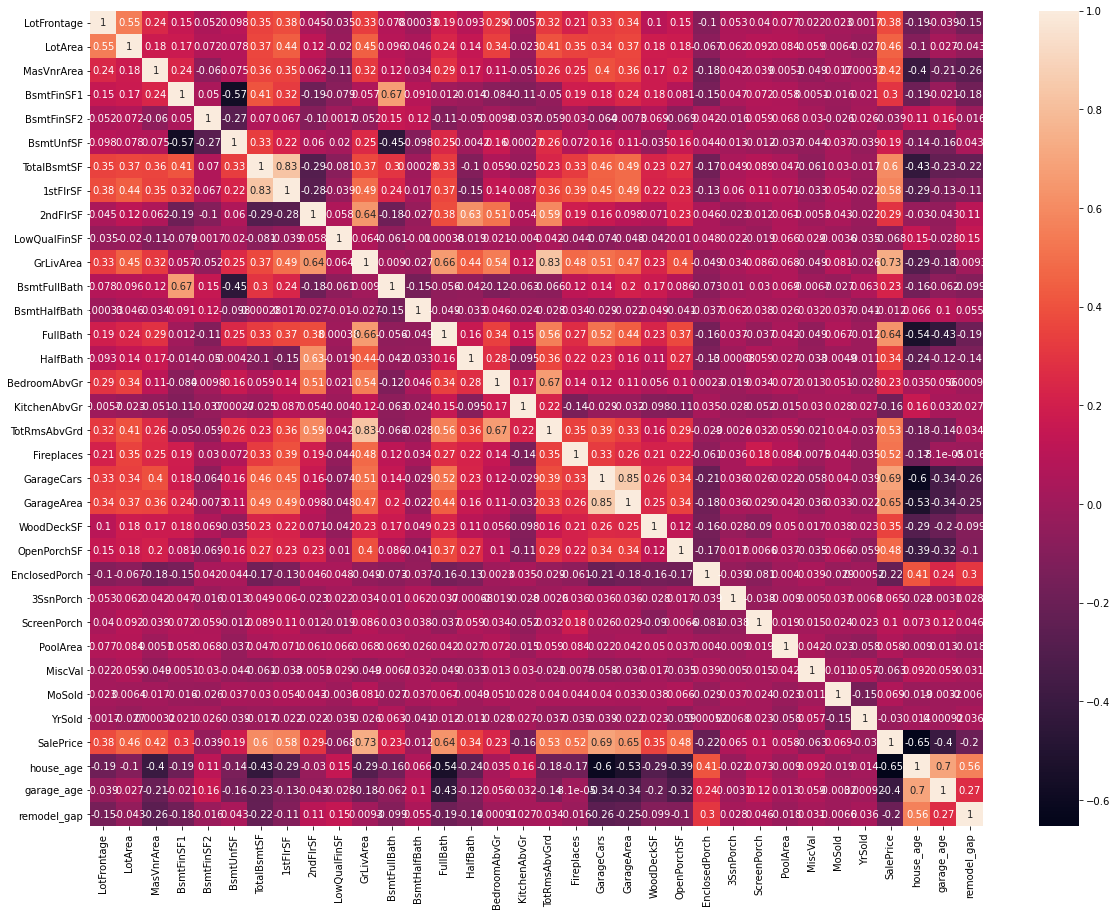

In [26]:
# Plotting heatmap to find the correlations

plt.figure(figsize=(20,15))  # setting figure size
sns.heatmap(housing.corr(method='spearman'),annot=True)    # plotting heatmap
plt.show()

**From the above heatmap, We can conclude that some features like OverallQual,GrLivArea,GarageCars,GarageArea,house_age are having high positive correlations with target varaible i.e SalePrice.**

<Figure size 2880x2160 with 0 Axes>

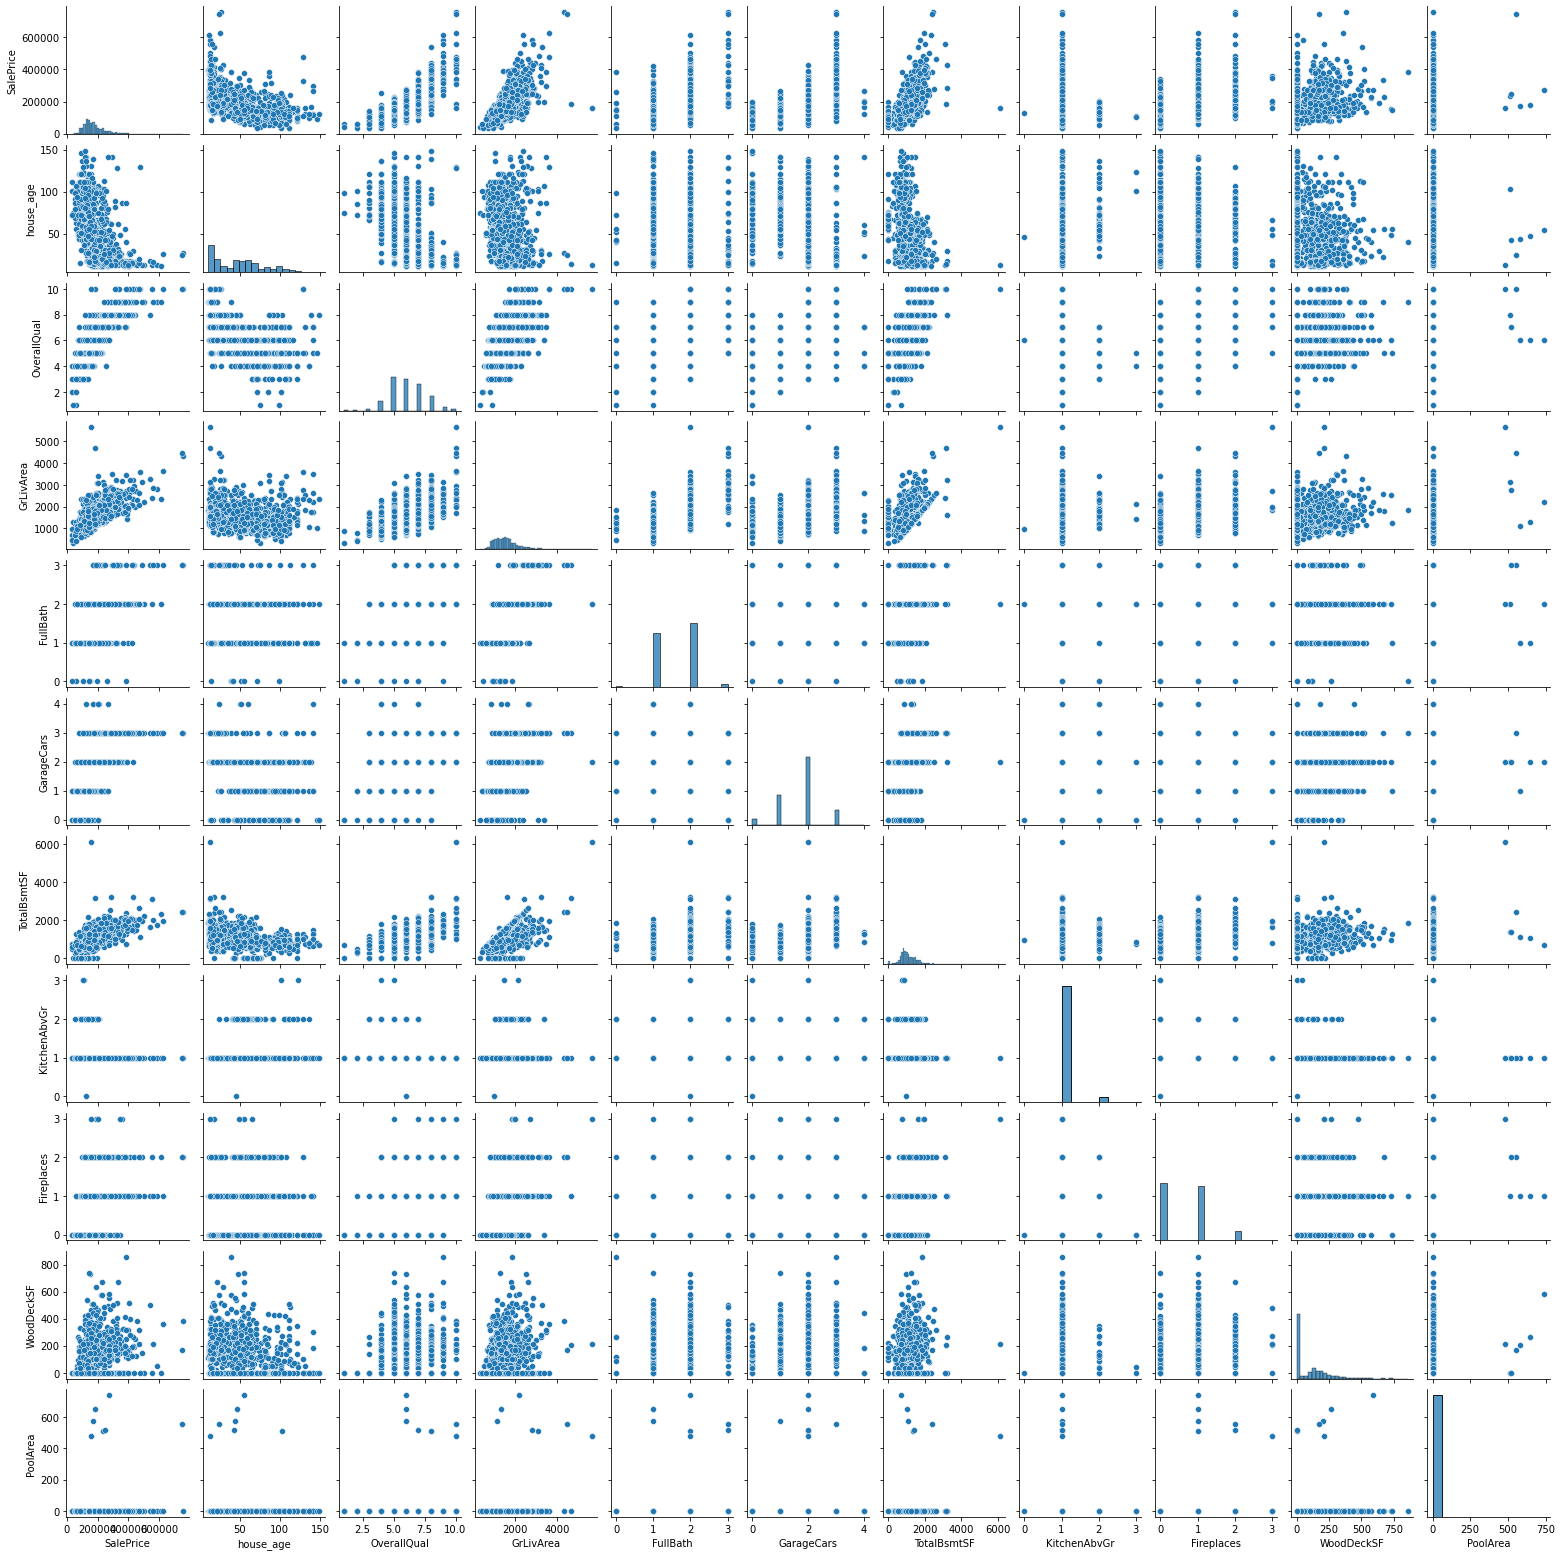

In [27]:
# Let's make a pairplot of some numerical features 
# 1. which are highly correlated to Target features - SalePrice
# 2. which are minimaly correlated to Target features - SalePrice

plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'house_age', 'OverallQual', 'GrLivArea', 'FullBath', 'GarageCars', 'TotalBsmtSF',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea']
sns.pairplot(housing[cols], size=2)
plt.show()

From above pairplots we can see that - 'PoolArea' has a high concentration value and not linearly related to SalePrice

### Visualisation of Features w.r.t Target variable

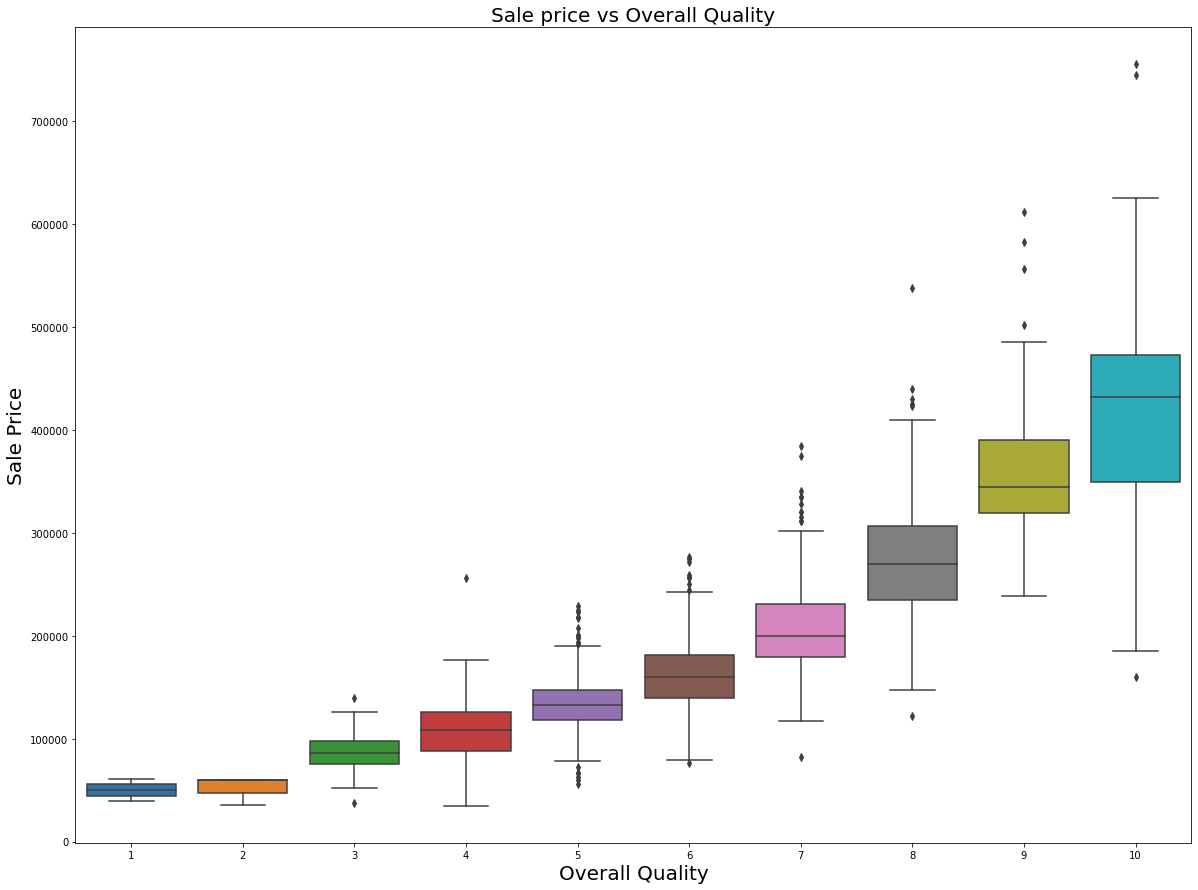

In [28]:
plt.figure(figsize=(20,15))                               # Setting the figure size
sns.boxplot(x='OverallQual',y='SalePrice',data=housing)  # Creating boxplot to understand the distribution
plt.title('Sale price vs Overall Quality',fontsize=20)    # Setting the title
plt.xlabel('Overall Quality',fontsize=20)                 # Setting the x-label
plt.ylabel('Sale Price',fontsize=20)                      # Setting the x-label
plt.show()

From above figure we can concluded that -

- For Quality value 1, sale price is very less with other quality values
- For Quality value 10, sale price is the highest than the others
- For Quality value 10, we have some outliers as well
- Also we see that the sale price increase gradually with the progression of quality value.

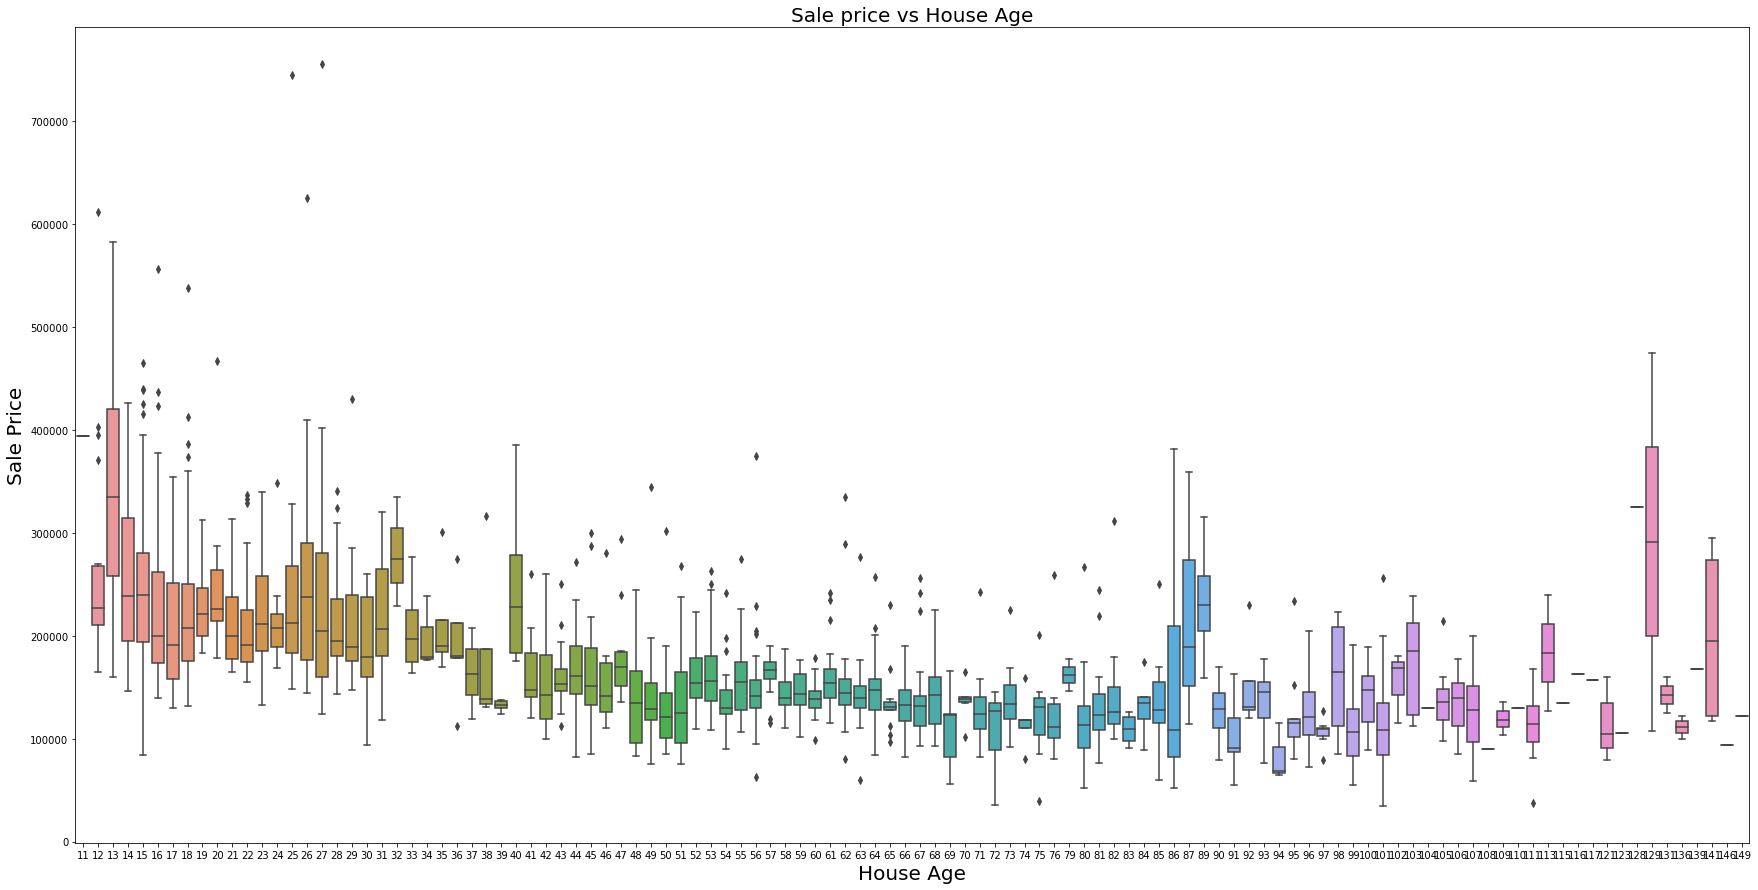

In [29]:
plt.figure(figsize=(30,15))                               # Setting the figure size
sns.boxplot(x='house_age',y='SalePrice',data=housing)  # Creating boxplot to understand the distribution
plt.title('Sale price vs House Age',fontsize=20)    # Setting the title
plt.xlabel('House Age',fontsize=20)                 # Setting the x-label
plt.ylabel('Sale Price',fontsize=20)                      # Setting the x-label
plt.show()

From above figure we can concluded that -

- New houses, i.e age < 20 years have HIGH SalesPrice
- Some Old houses also have high salesprices but overall or average price among old houses are low
- Mid-aged houses have nearly similar SalePrice
- We can see Outliers in almost every segment or age

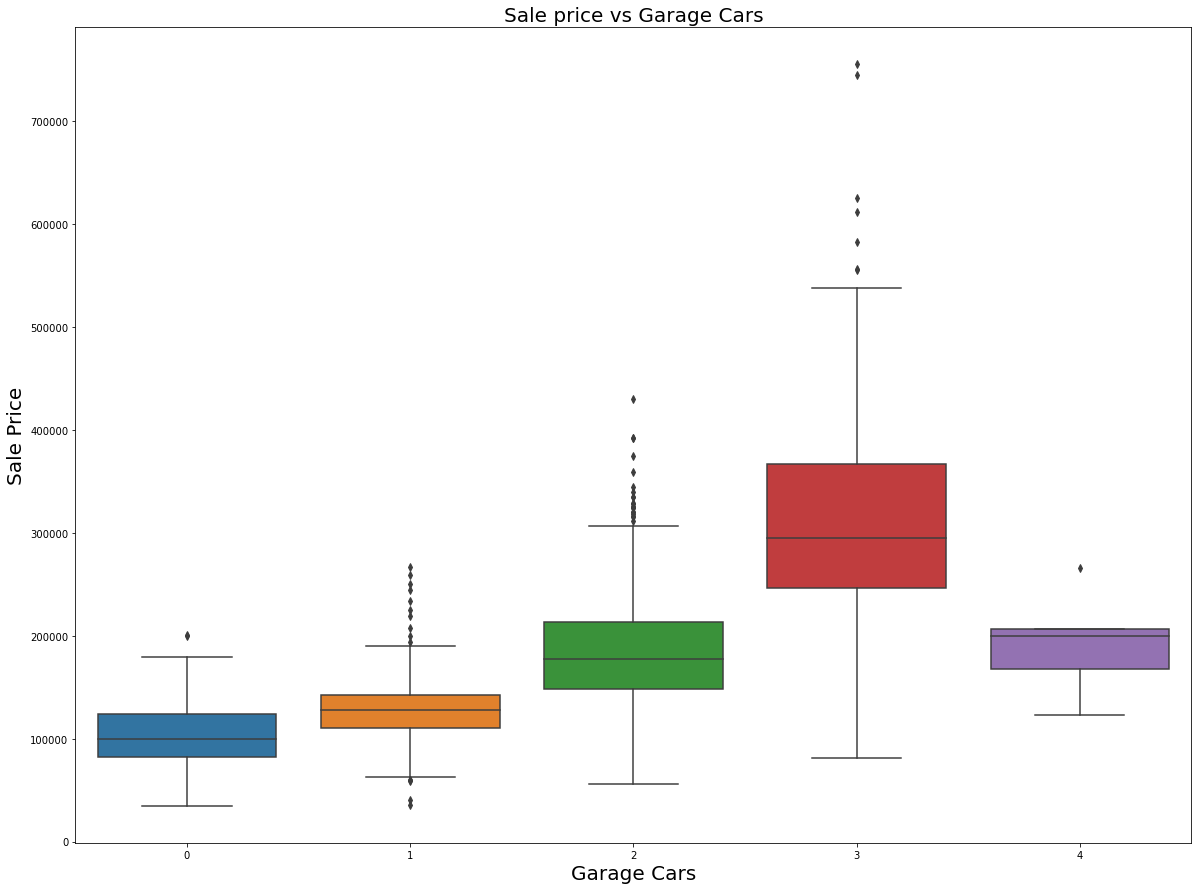

In [30]:
plt.figure(figsize=(20,15))                               # Setting the figure size
sns.boxplot(x='GarageCars',y='SalePrice',data=housing)  # Creating boxplot to understand the distribution
plt.title('Sale price vs Garage Cars',fontsize=20)    # Setting the title
plt.xlabel('Garage Cars',fontsize=20)                 # Setting the x-label
plt.ylabel('Sale Price',fontsize=20)                      # Setting the x-label
plt.show()

From above figure we can concluded that -

- In general, House Price increases with Number of Garages
- Although, houses with 3 Garages seems to have highest SalePrice among all.

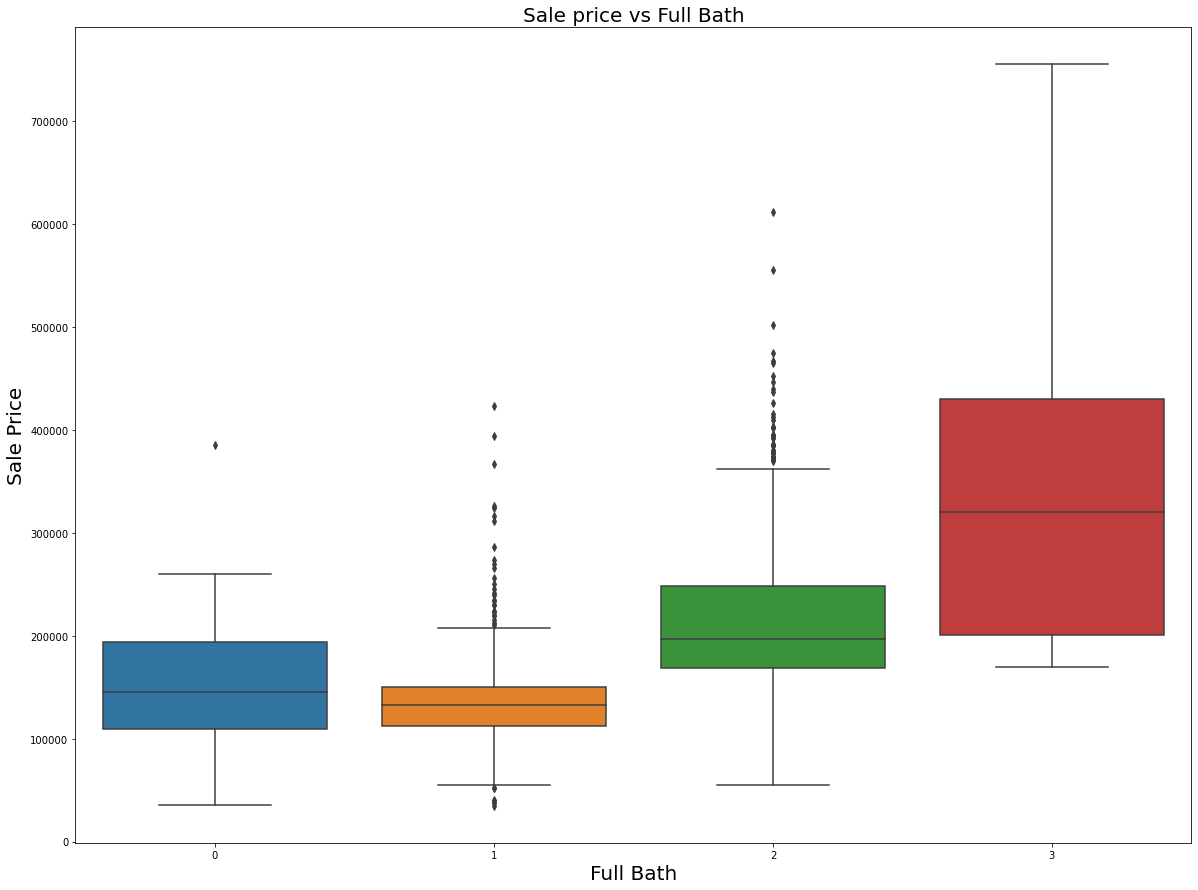

In [31]:
plt.figure(figsize=(20,15))                               # Setting the figure size
sns.boxplot(x='FullBath',y='SalePrice',data=housing)  # Creating boxplot to understand the distribution
plt.title('Sale price vs Full Bath',fontsize=20)    # Setting the title
plt.xlabel('Full Bath',fontsize=20)                 # Setting the x-label
plt.ylabel('Sale Price',fontsize=20)                      # Setting the x-label
plt.show()

From above figure we can concluded that -

- In general, House Price increases with Number of Full Bathrooms (0 Fullbath houses may have Halfbath available, thus high price than 1 Full Bath)
- Houses with 3 Full Bath to have highest SalePrice among all expanding upto almost 4 times higher than mean price of Houses with 2 FullBath

### Numerical feature Analysis - Distplot

#### PoolArea

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

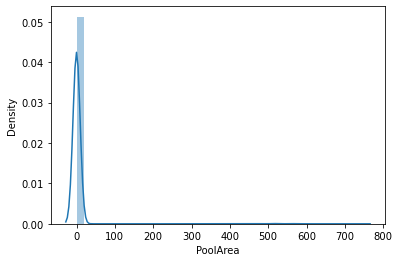

In [32]:
# Checking distribution of 'PoolArea'
sns.distplot(housing['PoolArea'])

In [33]:
# Checking values thier counts for this feature
housing.PoolArea.value_counts()

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

As we can see that except 7 data,  all data in the dataset have 0 Pool so this feature doesnt give any insight about SalePrice variation. **This can be dropped from analysis.**

#### EnclosedPorch, 3SsnPorch and ScreenPorch

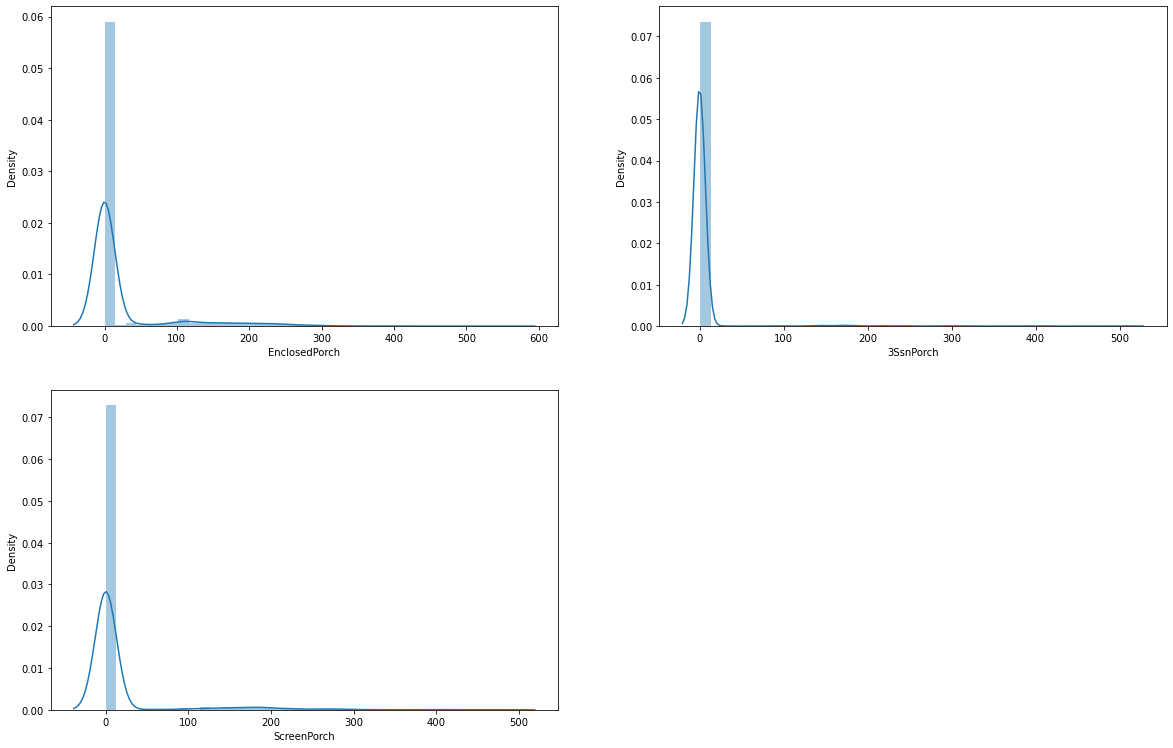

In [34]:
# Checking the distribution of data for - 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'
col1 = ['EnclosedPorch','3SsnPorch','ScreenPorch']

plt.figure(figsize=(20, 20))
i = 0
for col in col1 :
    plt.subplot(3,2,i+1)
    sns.distplot(housing[col])
    i+=1

plt.show()

We can see the data for these columns are highly skewed. Lets see their correlation with Target variable - SalePrice

In [35]:
#Checking correlation with target variable - 'SalePrice'
housing[['EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']].corr()

,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
EnclosedPorch,1.000000,-0.037305,-0.082864,-0.128578
3SsnPorch,-0.037305,1.000000,-0.031436,0.044584
ScreenPorch,-0.082864,-0.031436,1.000000,0.111447
SalePrice,-0.128578,0.044584,0.111447,1.000000


We can see that these 3 features have very low correlation value with Target variable + Skewed distribution. 
So we can safely **Drop these features.**

#### LowQualFinSF

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

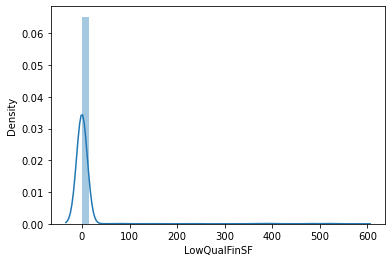

In [36]:
# Checking the distribution of data for - 'LowQualFinSF'
sns.distplot(housing['LowQualFinSF'])

We can see the data for this columns is highly skewed. Lets see their correlation with Target variable - SalePrice

In [37]:
#Checking correlation with target variable - 'SalePrice'
housing[['LowQualFinSF','SalePrice']].corr()

,LowQualFinSF,SalePrice
LowQualFinSF,1.000000,-0.025606
SalePrice,-0.025606,1.000000


We can see that this feature has very low correlation value with Target variable + Skewed distribution. 
So we can safely **Drop this feature.**

#### MiscVal

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

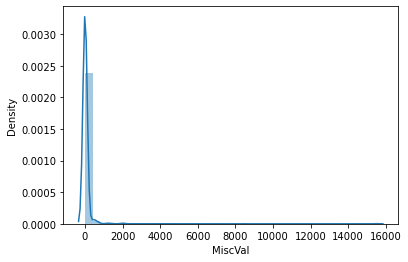

In [38]:
# Checking the distribution of data for - 'MisVal'
sns.distplot(housing['MiscVal'])

We can see the data for this columns is highly skewed. Lets see their correlation with Target variable - SalePrice

In [39]:
#Checking correlation with target variable - 'SalePrice'
housing[['MiscVal','SalePrice']].corr()

,MiscVal,SalePrice
MiscVal,1.00000,-0.02119
SalePrice,-0.02119,1.00000


We can see that this feature has very low correlation value with Target variable + Skewed distribution. 
So we can safely **Drop this feature.**

### Categorical feature Analysis - Countplots

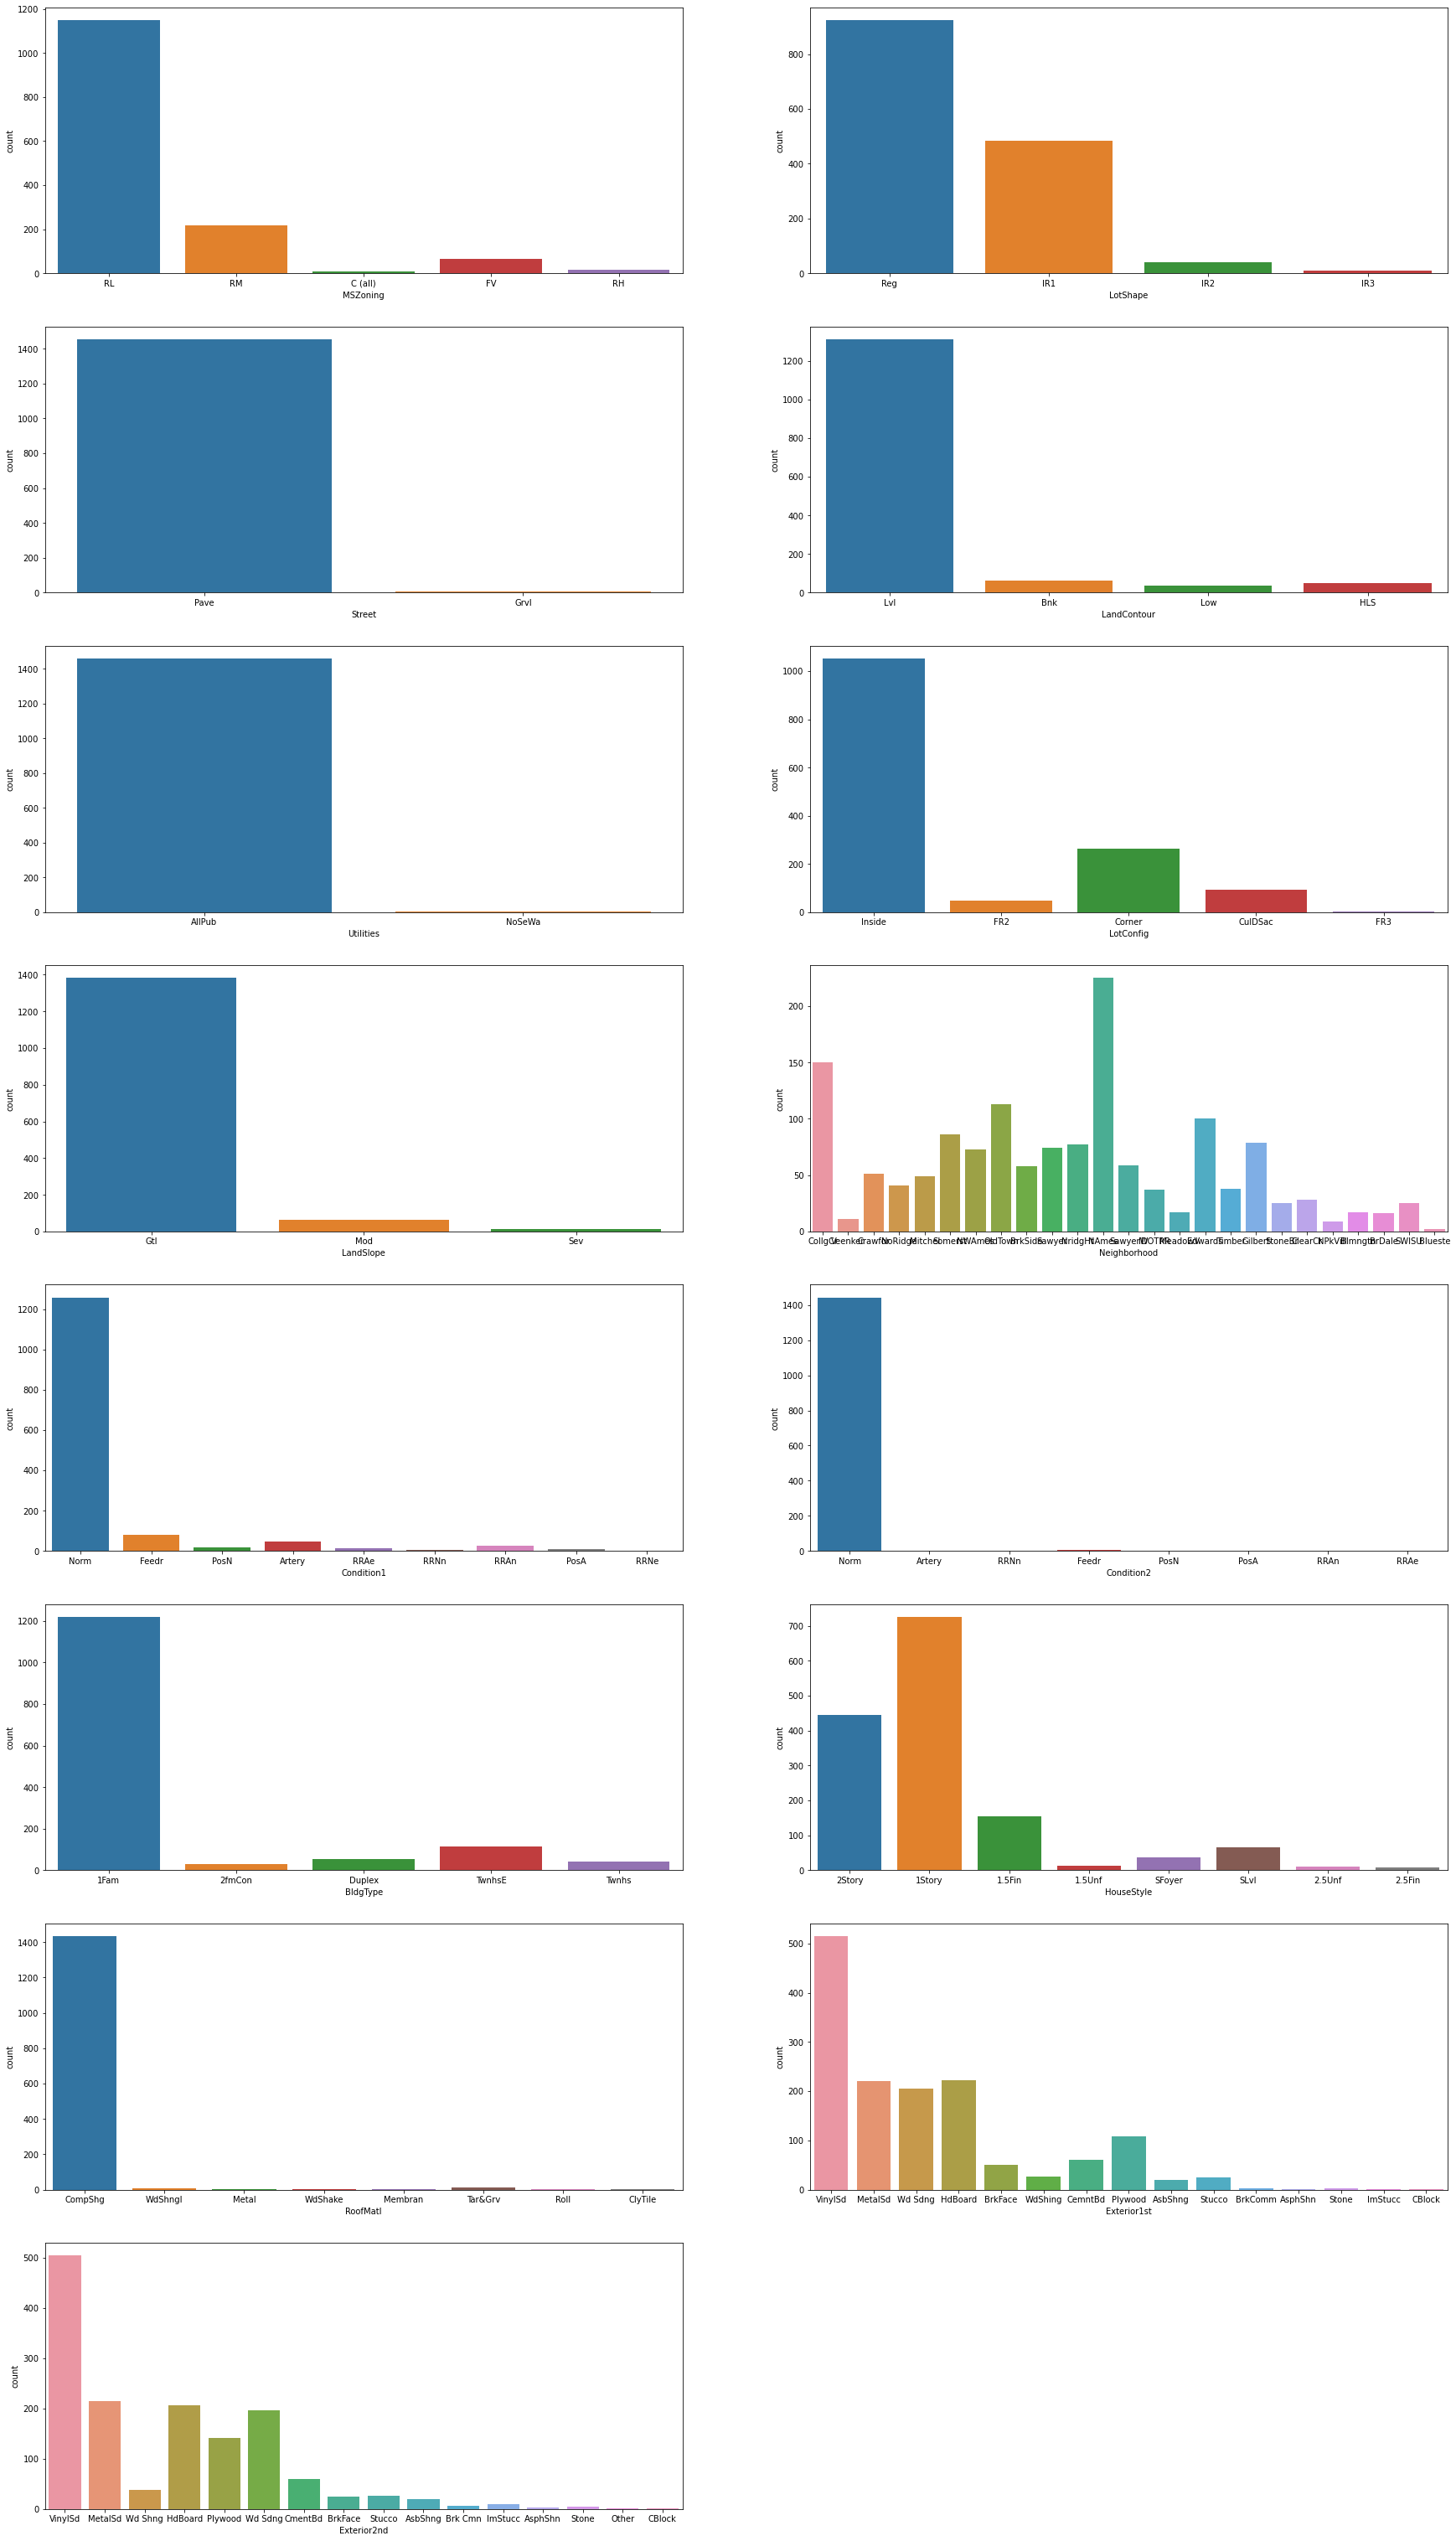

In [40]:
cat = ['MSZoning','LotShape','Street','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
       'BldgType','HouseStyle','RoofMatl','Exterior1st','Exterior2nd']

# Visualising Categorical Data

plt.figure(figsize=(30, 90))
i = 0
for colName in cat :
    plt.subplot(13,2,i+1)
    sns.countplot(x = colName, data = housing)
    i+=1

plt.show()

From above graphs we can see that following features have skewed values, thus not contributing to variation in SalePrice -
- Street
- Utilities
- LandSlope
- Condition2
- RoofMatl

These can be safely **drop from the dataset.**

#### Lets Analyse some Basement columns, and see if we can remove some

In [41]:
#Checking correlation with target variable - 'SalePrice'
housing[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','SalePrice']].corr()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
BsmtFinSF1,1.000000,-0.050117,-0.495251,0.522396,0.386420
BsmtFinSF2,-0.050117,1.000000,-0.209294,0.104810,-0.011378
BsmtUnfSF,-0.495251,-0.209294,1.000000,0.415360,0.214479
TotalBsmtSF,0.522396,0.104810,0.415360,1.000000,0.613581
SalePrice,0.386420,-0.011378,0.214479,0.613581,1.000000


We can see that 'BsmtFinSF2' and 'BsmtUnfSF' have low correlation with target variable 'SalePrice' but before deciding anything lets analyse the related categorical variables

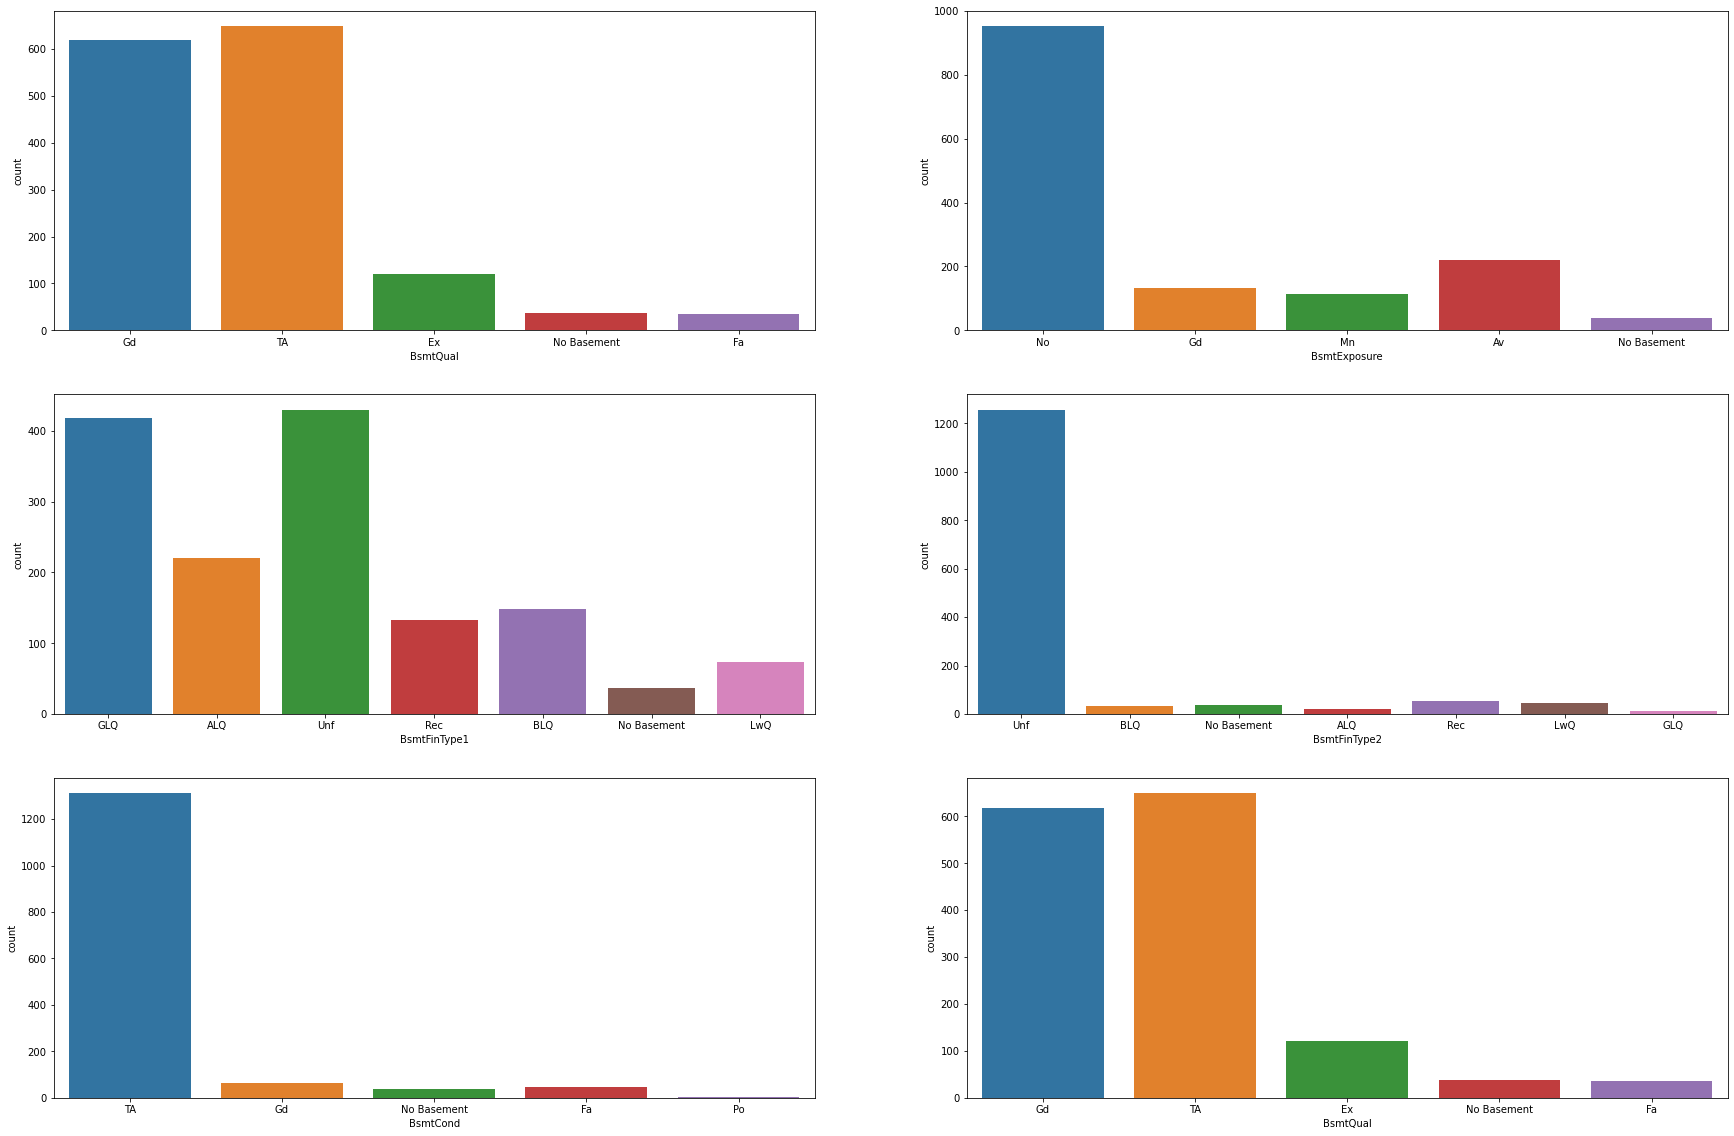

In [42]:
# Visualising the Basement related categorical variable

cat_basement = ['BsmtQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2','BsmtCond','BsmtQual']

# Visualising Categorical Data

plt.figure(figsize=(30, 20))
i = 0
for colName in cat_basement :
    plt.subplot(3,2,i+1)
    sns.countplot(x = colName, data = housing)
    i+=1

plt.show()

In [43]:
# We can see that - BsmtFinType2, which is related to - BsmtFinSF2, have maximum data assigned to 1 value.
# Lets see number of data for these

print(housing.BsmtFinType2.value_counts())

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64


**We can see that both variables - BsmtFinType2 and BsmtFinSF2 have both -**
- Low correlation with Target featues &
- Skewed value

These 2 can be safely dropped from the dataset

**Dropping the variables which we agree to remove after analysis -**
- PoolArea
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- LowQualFinSF
- MiscVal
- Street
- Utilities
- LandSlope
- Condition2
- RoofMatl
- BsmtFinType2
- BsmtFinSF2

In [44]:
housing = housing.drop(['PoolArea','EnclosedPorch', '3SsnPorch','ScreenPorch','LowQualFinSF','MiscVal','Street',
                       'Utilities','LandSlope','Condition2','RoofMatl','BsmtFinSF2','BsmtFinType2'],axis=1)

In [45]:
housing.shape

(1460, 63)

So we have gone down from 81 features to 63 variables after EDA.

## Data Preparation

### Binary Mapping and Dummies creation

In [46]:
# Creating binary variables for Central Air

def central_air():
    return{'N':0,'Y':1}              # setting value for N=0 and Y=1
housing['CentralAir']=housing['CentralAir'].map(central_air())  # mapping with the return value and setting the value

In [47]:
house_categorical=housing.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [48]:
# Converting categorical variables into dummy variables

dummies=['MSSubClass','MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1',
         'BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','Exterior1st','Exterior2nd',
         'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
         'Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu',
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

dummies_df=pd.get_dummies(housing[dummies],drop_first=True)   # Creating dummies

dummies_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0

In [49]:
# Concatenating with the Original DF 
house_df=pd.concat([housing,dummies_df],axis=1)


# Deleting repeated columns
house_df=house_df.drop(dummies,axis=1)
house_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,house_age,garage_age,remodel_gap,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,150,856,1,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,2,2008,208500,18,18.0,0,0,0,0,0,1,0,0,0,

### Preparing data for modelling

In [50]:
# split into X and y
X = house_df.drop(['SalePrice'], axis=1)
y = house_df['SalePrice']

#### Standardising the features - StandarScaler()

In [51]:
# Importing Standard Scaler library
from sklearn.preprocessing import StandardScaler

#Instatiation 
scaler=StandardScaler()    

cols_scale=X.columns                                     # Storing the columns as they will lost during scaling
X[cols_scale]=scaler.fit_transform(X[cols_scale])        # Now scaling

#### Train - Test Split

In [52]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

## Model Building and Evaluation

We will start with building a simple Linear Regression model first to see how the predictions looks like then proceed with Ridge and Lasso Model building.

### Linear Regression

#### Building and Training model

In [53]:
# Instantiating the LR object

lm = LinearRegression()

# Fitting the line
lm.fit(X_train, y_train)

LinearRegression()

#### Making Predictions

In [54]:
#Training data Prediction
y_pred_train = lm.predict(X_train)

#Test data Prediction
y_pred_test = lm.predict(X_test)

#### Model Evaluation

In [55]:
metric_lr =[]

#R2 score - Training
r2_train_lr = r2_score(y_train, y_pred_train)
print('------- LR Training R2 Score -------')
print(r2_train_lr)
metric_lr.append(r2_train_lr)

#RSS score - Training
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print('----------------------------------------')
print('------- LR Training RSS Score -------')
print(rss_train_lr)
metric_lr.append(rss_train_lr)


#MSE score - Training
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('----------------------------------------')
print('------- LR Training MSE Score -------')
print(mse_train_lr)
metric_lr.append(mse_train_lr**0.5)

print('*'*45)
print('*'*45)

#R2 score - Test
r2_test_lr = r2_score(y_test, y_pred_test)
print('----------------------------------------')
print('------- LR Test R2 Score -------')
print(r2_test_lr)
metric_lr.append(r2_test_lr)

#RSS score - Test
rss_test_lr = np.sum(np.square(y_test, y_pred_test))
print('----------------------------------------')
print('------- LR Test RSS Score -------')
print(rss_test_lr)
metric_lr.append(rss_test_lr)

#MSE score - Test
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('----------------------------------------')
print('------- LR Test MSE Score -------')
print(mse_test_lr)
metric_lr.append(mse_test_lr**0.5)

------- LR Training R2 Score -------
0.9048687626719327
----------------------------------------
------- LR Training RSS Score -------
607003771811.9666
----------------------------------------
------- LR Training MSE Score -------
594518875.427979
*********************************************
*********************************************
----------------------------------------
------- LR Test R2 Score -------
-8.660356974742609e+22
----------------------------------------
------- LR Test RSS Score -------
17301027658488.0
----------------------------------------
------- LR Test MSE Score -------
3.3537303770405745e+21


**We can clearly see that Accuracy of Training dataset vs Accuracy of Test data is way off. This clearly shows that model is Overfitting the training dataset** <br>
**We will now proceed with using Regularization techniques - RIDGE & LASSO, and we will see if this gives us improved results/accuracy**

### Ridge Regression

#### Building and Training model

In [56]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                    5.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000, 1500, 1700, 2000]}

#Using KFold for cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


In [57]:
#Instantiating the model
ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   5.0, 10.0, 20, 50, 100, 200, 300, 400, 500,
                                   1000, 1500, 1700, 2000]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 300}


In [59]:
# cv results
cv_results_ridge = pd.DataFrame(model_cv.cv_results_)
cv_results_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007327,0.001660,0.003376,0.000040,0.0001,{'alpha': 0.0001},0.692392,0.727712,0.858547,0.814383,0.828643,0.784335,0.063298,19,0.926593,0.919916,0.902873,0.912955,0.906030,0.913674,0.008735
1,0.006676,0.000471,0.003297,0.000089,0.001,{'alpha': 0.001},0.692396,0.727716,0.858549,0.814385,0.828643,0.784338,0.063297,18,0.926593,0.919916,0.902873,0.912955,0.906030,0.913674,0.008735
2,0.008431,0.002451,0.003762,0.000660,0.01,{'alpha': 0.01},0.692437,0.727755,0.858568,0.814405,0.828651,0.784363,0.063285,17,0.926593,0.919916,0.902873,0.912955,0.906030,0.913673,0.008735
3,0.009194,0.002102,0.003888,0.000353,0.05,{'alpha': 0.05},0.692611,0.727924,0.858649,0.814494,0.828689,0.784474,0.063237,16,0.926593,0.919916,0.902873,0.912955,0.906030,0.913673,0.008735
4,0.007646,0.000678,0.003950,0.000404,0.1,{'alpha': 0.1},0.692810,0.728128,0.858745,0.814602,0.828742,0.784606,0.063183,15,0.926591,0.919915,0.902872,0.912955,0.906029,0.913672,0.008734
5,0.006844,0.001343,0.003501,0.000628,0.5,{'alpha': 0.5},0.693972,0.729537,0.859376,0.815366,0.829260,0.785502,0.062887,14,0.926559,0.919903,0.902854,0.912940,0.906010,0.913653,0.008731
6,0.004850,0.000070,0.002571,0.000061,1.0,{'alpha': 1.0},0.694920,0.730936,0.859962,0.816144,0.829957,0.786384,0.062671,13,0.926511,0.919874,0.902814,0.912905,0.905972,0.913615,0.008730
7,0.004834,0.000048,0.002553,0.000043,5.0,{'alpha': 5.0},0.699109,0.737647,0.863086,0.819773,0.834058,0.790735,0.061916,11,0.926137,0.919489,0.902374,0.912459,0.905558,0.913203,0.008753
8,0.004884,0.000058,0.002518,0.000055,10.0,{'alpha': 10.0},0.702302,0.742777,0.866363,0.822329,0.836912,0.794137,0.061502,10,0.925621,0.918926,0.901817,0.911874,0.905002,0.912648,0.008764
9,0.004835,0.000045,0.002531,0.000036,20,{'alpha': 20},0.706007,0.749717,0.871587,0.825644,0.840139,0.798619,0.061232,8,0.924549,0.917733,0.900659,0.910728,0.903887,0.911511,0.008777


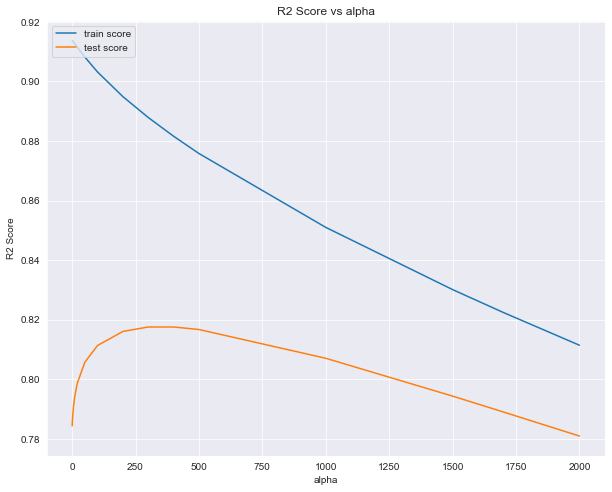

In [60]:
# Setting graph style

sns.set_style('darkgrid')

# Setting figure size

plt.figure(figsize=(10,8))


# plotting mean test and train scoes with alpha 
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')

plt.title("R2 Score vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
#Fitting Ridge model for alpha =300 and printing coefficients which have been penalised

alpha =300

ridge_best = Ridge(alpha=alpha)
        
ridge_best.fit(X_train, y_train)

Ridge(alpha=300)

In [62]:
ridge_best.coef_

array([-6.65584731e+02,  2.74010853e+03,  2.99717925e+03,  1.32092572e+03,
        7.96490240e+02,  2.92688865e+03,  1.19182500e+03,  5.23985083e+03,
        5.68549677e+03,  8.38473655e+03,  2.98393567e+03,  4.32823812e+02,
        4.69999257e+03,  2.28316948e+03,  4.37945419e+02, -2.21629350e+03,
        3.81586006e+03,  2.82895645e+03,  5.10679738e+03,  2.79022372e+03,
        1.60728620e+03,  2.25854053e+02, -3.73112383e+02, -5.47091945e+02,
       -2.79611400e+03, -8.04782782e+02,  1.29432651e+03, -9.92352223e+02,
       -2.37996077e+02,  6.79434893e+01, -1.10986527e+02, -7.91561903e+01,
        4.90123914e+02,  3.39872604e+02, -6.01575165e+02, -3.06765347e+02,
       -1.02680982e+03, -1.91139265e+03, -1.70653647e+03, -5.06950117e+02,
       -1.28310868e+03,  8.41417548e+02,  5.42581153e+02,  1.18934200e+03,
       -2.84614025e+02,  6.60818402e+02, -1.97613585e+03,  1.22466909e+02,
        1.65529753e+03,  1.79145641e+03,  2.75808626e+03,  2.10268464e+03,
       -1.46465443e+03, -

#### Making Predictions

In [63]:
#Training data Prediction
y_pred_train_ridge = ridge_best.predict(X_train)

#Test data Prediction
y_pred_test_ridge = ridge_best.predict(X_test)

#### Model Evaluation

In [64]:
metric_ridge=[]

#R2 score - Training
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print('------- Ridge Training R2 Score -------')
print(r2_train_ridge)
metric_ridge.append(r2_train_ridge)

#RSS score - Training
rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print('----------------------------------------')
print('------- Ridge Training RSS Score -------')
print(rss_train_ridge)
metric_ridge.append(rss_train_ridge)

#MSE score - Training
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print('----------------------------------------')
print('------- Ridge Training MSE Score -------')
print(mse_train_ridge)
metric_ridge.append(mse_train_ridge**0.5)


#R2 score - Test
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print('----------------------------------------')
print('------- Ridge Test R2 Score -------')
print(r2_test_ridge)
metric_ridge.append(r2_test_ridge)

#RSS score - Test
rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print('----------------------------------------')
print('------- Ridge Test RSS Score -------')
print(rss_train_ridge)
metric_ridge.append(rss_train_ridge)

#MSE score - Test
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print('----------------------------------------')
print('------- Ridge Test MSE Score -------')
print(mse_test_ridge)
metric_ridge.append(mse_test_ridge**0.5)

------- Ridge Training R2 Score -------
0.88431387352077
----------------------------------------
------- Ridge Training RSS Score -------
738158328342.1755
----------------------------------------
------- Ridge Training MSE Score -------
722975835.7905735
----------------------------------------
------- Ridge Test R2 Score -------
0.8668199179482693
----------------------------------------
------- Ridge Test RSS Score -------
738158328342.1755
----------------------------------------
------- Ridge Test MSE Score -------
857069328.9321852


<font size=3>**Ridge regression model is having good R2 score for `alpha=300` for Train and Test data, hence this can be considered as final value.**

In [65]:
# Ridge model parameters with alpha = 300
model_parameters = list(ridge_best.coef_)
model_parameters.insert(0, ridge_best.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'BsmtQual_Gd': -4637.645,
 'Neighborhood_Edwards': -4025.432,
 'BsmtQual_TA': -3856.217,
 'KitchenQual_TA': -3626.682,
 'OverallQual_5': -3408.208,
 'OverallQual_6': -3288.48,
 'BsmtExposure_No': -3238.684,
 'KitchenQual_Gd': -3120.283,
 'house_age': -2796.114,
 'ExterQual_TA': -2649.814,
 'FireplaceQu_None': -2475.621,
 'OverallQual_4': -2339.479,
 'BsmtFinType1_Unf': -2277.364,
 'KitchenAbvGr': -2216.293,
 'GarageFinish_Unf': -2097.641,
 'LotShape_IR3': -1976.136,
 'MSSubClass_120': -1911.393,
 'BldgType_TwnhsE': -1824.286,
 'Neighborhood_NAmes': -1801.654,
 'Condition1_Feedr': -1787.477,
 'BldgType_Twnhs': -1786.753,
 'OverallCond_5': -1764.946,
 'Exterior2nd_Stucco': -1739.275,
 'MSSubClass_160': -1706.536,
 'Neighborhood_Mitchel': -1610.462,
 'Neighborhood_OldTown': -1539.465,
 'Neighborhood_MeadowV': -1479.827,
 'Condition1_PosN': -1475.043,
 'LotConfig_FR2': -1464.654,
 'HeatingQC_TA': -1435.465,
 'OverallCond_4': -1387.782,
 'Neighborhood_Sawyer': -1379.149,
 'Exterior2nd_Wd S

**Top 10 features from Ridge Regression -
'GrLivArea','OverallQual', 'Neighborhood_NoRidge','1stFlrSF','Neighborhood_NridgHt','2ndFlrSF', 'GarageCars','FullBath','BsmtExposure_Gd','TotRmsAbvGrd','TotalBsmtSF'**

### Lasso Regression

#### Building and Training Model

In [66]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                    5.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000, 1500, 1700, 2000 ]}

#Using KFold for cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [67]:
#Instantiating the model
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   5.0, 10.0, 20, 50, 100, 200, 300, 400, 500,
                                   1000, 1500, 1700, 2000]},
             return_train_score=True, scoring='r2', verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [69]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.095370,0.015115,0.002841,0.000477,0.0001,{'alpha': 0.0001},0.691678,0.727747,0.858379,0.812323,0.822883,0.782602,0.062489,20,0.926591,0.919915,0.902873,0.912955,0.906029,0.913673,0.008734
1,0.104213,0.017505,0.003028,0.000424,0.001,{'alpha': 0.001},0.691679,0.727747,0.858380,0.812335,0.822892,0.782606,0.062491,19,0.926591,0.919915,0.902873,0.912955,0.906029,0.913673,0.008734
2,0.098328,0.011238,0.003097,0.000454,0.01,{'alpha': 0.01},0.691686,0.727748,0.858388,0.812451,0.822980,0.782650,0.062513,18,0.926591,0.919915,0.902873,0.912955,0.906029,0.913673,0.008734
3,0.098950,0.006305,0.002721,0.000059,0.05,{'alpha': 0.05},0.691718,0.727753,0.858422,0.812945,0.823362,0.782840,0.062608,17,0.926591,0.919915,0.902873,0.912955,0.906029,0.913673,0.008734
4,0.107328,0.014380,0.003674,0.000948,0.1,{'alpha': 0.1},0.691759,0.727759,0.858465,0.813509,0.823823,0.783063,0.062720,16,0.926591,0.919915,0.902873,0.912955,0.906029,0.913672,0.008734
5,0.089023,0.002494,0.002888,0.000466,0.5,{'alpha': 0.5},0.692084,0.727818,0.858691,0.814080,0.826810,0.783897,0.063121,15,0.926589,0.919915,0.902872,0.912954,0.906028,0.913672,0.008734
6,0.082966,0.004171,0.002542,0.000042,1.0,{'alpha': 1.0},0.692446,0.727966,0.858917,0.814079,0.828215,0.784324,0.063235,14,0.926586,0.919915,0.902872,0.912954,0.906027,0.913671,0.008733
7,0.081922,0.003549,0.002766,0.000475,5.0,{'alpha': 5.0},0.694518,0.728716,0.860568,0.815578,0.829980,0.785872,0.063277,13,0.926546,0.919898,0.902848,0.912928,0.905999,0.913644,0.008730
8,0.080051,0.002524,0.002536,0.000024,10.0,{'alpha': 10.0},0.696342,0.730019,0.862154,0.817212,0.831906,0.787527,0.063312,12,0.926464,0.919858,0.902786,0.912865,0.905929,0.913580,0.008729
9,0.069479,0.009559,0.002668,0.000241,20,{'alpha': 20},0.698210,0.732413,0.864336,0.820096,0.835370,0.790085,0.063611,11,0.926268,0.919717,0.902575,0.912699,0.905762,0.913404,0.008735


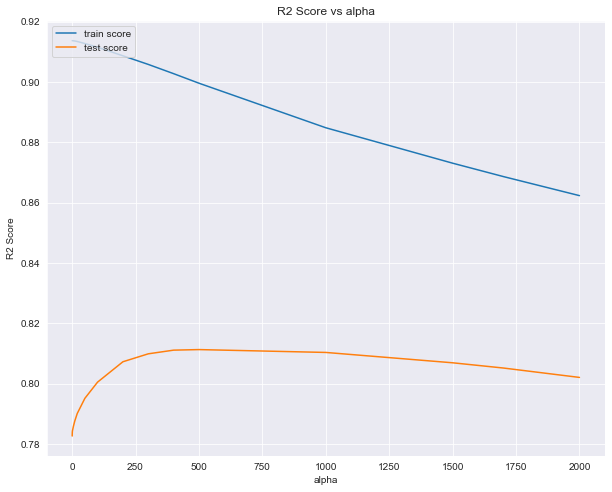

In [70]:
# Setting graph style

sns.set_style('darkgrid')

# Setting figure size

plt.figure(figsize=(10,8))

# plotting mean test and train scoes with alpha 
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')

plt.title("R2 Score vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [71]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso_best = Lasso(alpha=alpha)
        
lasso_best.fit(X_train, y_train)

Lasso(alpha=500)

In [72]:
lasso_best.coef_

array([-1.78442244e+03,  3.05760176e+03,  9.18810187e+02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.77898353e+02,  0.00000000e+00,
        2.34309385e+03,  2.53773404e+04,  3.61099570e+03,  2.65913520e+02,
        3.77200629e+03,  5.40704637e+02, -0.00000000e+00, -3.99492559e+03,
        0.00000000e+00,  1.12227426e+03,  7.53560205e+03, -0.00000000e+00,
        7.53022252e+02, -0.00000000e+00, -3.33813707e+02, -0.00000000e+00,
       -6.86166381e+03, -0.00000000e+00,  7.03665216e+02, -3.23802097e+02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.81472981e+02, -3.65238025e+02, -2.08855558e+02, -0.00000000e+00,
       -1.09199353e+03,  0.00000000e+00,  2.12502053e+02,  9.52154673e+02,
       -0.00000000e+00,  6.06841120e+02, -1.41987204e+03,  0.00000000e+00,
        1.46383768e+03,  2.31608833e+03,  4.07867260e+03,  2.09595245e+03,
       -1.02939176e+03, -

#### Making Predictions

In [73]:
#Training data Prediction
y_pred_train_lasso = lasso_best.predict(X_train)

#Test data Prediction
y_pred_test_lasso = lasso_best.predict(X_test)

#### Model Evaluation

In [74]:
metric_lasso = []

#R2 score - Training
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print('------- Lasso Training R2 Score -------')
print(r2_train_lasso)
metric_lasso.append(r2_train_lasso)

#RSS score - Training
rss_train_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print('----------------------------------------')
print('------- Lasso Training RSS Score -------')
print(rss_train_lasso)
metric_lasso.append(rss_train_lasso)

#MSE score - Training
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print('----------------------------------------')
print('------- Lasso Training MSE Score -------')
print(mse_train_lasso)
metric_lasso.append(mse_train_lasso**0.5)


#R2 score - Test
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print('----------------------------------------')
print('------- Lasso Test R2 Score -------')
print(r2_test_lasso)
metric_lasso.append(r2_test_lasso)

#RSS score - Test
rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print('----------------------------------------')
print('------- Lasso Test RSS Score -------')
print(rss_test_lasso)
metric_lasso.append(rss_test_lasso)

#MSE score - Test
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print('----------------------------------------')
print('------- Lasso MSE Test Score -------')
print(mse_test_lasso)
metric_lasso.append(mse_test_lasso**0.5)

------- Lasso Training R2 Score -------
0.8919666830366899
----------------------------------------
------- Lasso Training RSS Score -------
689328055851.3179
----------------------------------------
------- Lasso Training MSE Score -------
675149907.7877746
----------------------------------------
------- Lasso Test R2 Score -------
0.8698713851695669
----------------------------------------
------- Lasso Test RSS Score -------
366795157179.67224
----------------------------------------
------- Lasso MSE Test Score -------
837431865.7070142


<font size=3>**Lasso regression model is having good R2 score for `alpha=500` for Train and Test data, hence this can be considered as final value.**

In [75]:
# Lasso model parameters with alpha = 500
model_parameters = list(lasso_best.coef_)
model_parameters.insert(0, lasso_best.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'BsmtQual_Gd': -7903.433,
 'BsmtQual_TA': -6912.845,
 'house_age': -6861.664,
 'KitchenQual_TA': -4764.04,
 'KitchenAbvGr': -3994.926,
 'BldgType_TwnhsE': -3914.461,
 'Neighborhood_Edwards': -3899.24,
 'KitchenQual_Gd': -3820.313,
 'OverallCond_5': -3326.591,
 'BldgType_Twnhs': -3283.597,
 'BsmtExposure_No': -2581.949,
 'BsmtFinType1_Unf': -2348.722,
 'FireplaceQu_None': -2218.889,
 'BsmtExposure_No Basement': -2058.956,
 'GarageFinish_Unf': -1910.08,
 'Exterior2nd_Stucco': -1807.095,
 'LotFrontage': -1784.422,
 'Heating_OthW': -1537.988,
 'OverallCond_4': -1509.079,
 'Condition1_PosN': -1499.642,
 'OverallCond_3': -1425.59,
 'LotShape_IR3': -1419.872,
 'BsmtQual_No Basement': -1307.085,
 'BsmtQual_Fa': -1286.874,
 'Functional_Sev': -1140.009,
 'MSSubClass_190': -1091.994,
 'Neighborhood_Mitchel': -1051.811,
 'LotConfig_FR2': -1029.392,
 'HouseStyle_2Story': -1006.165,
 'Neighborhood_OldTown': -974.232,
 'GarageCond_Gd': -935.003,
 'Exterior2nd_Wd Shng': -927.362,
 'BsmtCond_Po': -914

**Top 10 features from Lasso Regression - 
'GrLivArea','OverallQual','GarageCars','Neighborhood_NoRidge','Neighborhood_NridgHt','BsmtExposure_Gd',
'Neighborhood_Crawfor','SaleType_New','Condition1_Norm','BsmtFinType1_GLQ','TotalBsmtSF','BsmtFullBath','LotArea'**

This list nearly matches with the Top features provided by Ridge Regression.

**Top 10 features from Ridge Regression -
'GrLivArea','OverallQual', 'Neighborhood_NoRidge','1stFlrSF','Neighborhood_NridgHt','2ndFlrSF', 'GarageCars','FullBath','BsmtExposure_Gd','TotRmsAbvGrd','TotalBsmtSF'**

## Conclusion

Lets compare the various model evaluation metrics

In [76]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','RSS (Train)','RMSE (Train)','R2 Score (Test)','RSS (Test)',
                       'RMSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.048688e-01,8.843139e-01,8.919667e-01
1,RSS (Train),6.070038e+11,7.381583e+11,6.893281e+11
2,RMSE (Train),2.438276e+04,2.688821e+04,2.598365e+04
3,R2 Score (Test),-8.660357e+22,8.668199e-01,8.698714e-01
4,RSS (Test),1.730103e+13,7.381583e+11,3.667952e+11
5,RMSE (Test),5.791140e+10,2.927575e+04,2.893842e+04


Top features selected by both Ridge and Lasso Regression model nearly matches. Also, the TEST scores produced by both models are also close to each other
- **R2 Test Score - Rigde :: 0.866** 
- **R2 Test Score - Lasso :: 0.869** 


However, we will go with **Lasso Model** as it has **High R2 score** and **Low RMSE** for Test data and also does Feature elimination based on coefficient values (=0)

<font size=3>**Top 15 Features by Lasso Regression model for Predicting House price**<br>
- GrLivArea:-  Above ground living area square feet
- OverallQual:-  Overall Quality of House
- GarageCars:-  Size of garage in car capacity
- Neighborhood_NoRidge:-  Neighborhood Northridge
- Neighborhood_NridgHt:- Neighborhood Northridge Heights
- BsmtExposure_Gd:-  Houses with good Basement Exposure
- Neighborhood_Crawfor:-  Houses near Crawford area are expensive
- SaleType_New:-  Home just constructed and sold
- Condition1_Norm:-  Normal condition of house affects the price
- BsmtFinType1_GLQ:-  Basement finished area - Good Living Quarters
- BsmtFullBath:-  Basement which has Full bathroom affects house price
- LotArea: Bigger Lot size houses affects house price
- TotalBsmtSF:-  Bigger basement sold for higher price
- FullBath:-  No. of Full Bath available direcly impacts to price
- Fireplaces: No. of fireplaces in the house